Section 1: Setup and data loading

In [2]:
# importing core libraries
import pandas as pd
import numpy as np

# setting display options for seeing more columns while exploring
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [4]:
#2.1 Loading the PDE file

In [6]:
# loading the Pde file which contains multiple service years inside
Pde = pd.read_csv("PDE.csv", sep="|", dtype=str)

# checking structure for understanding the file
print("Pde shape:", Pde.shape)
print("Pde columns:", list(Pde.columns))

Pde shape: (515520, 36)
Pde columns: ['PDE_ID', 'BENE_ID', 'SRVC_DT', 'PD_DT', 'PRSCRBR_ID_QLFYR_CD', 'PRSCRBR_ID', 'RX_SRVC_RFRNC_NUM', 'PROD_SRVC_ID', 'PLAN_CNTRCT_REC_ID', 'PLAN_PBP_REC_NUM', 'CMPND_CD', 'DAW_PROD_SLCTN_CD', 'QTY_DSPNSD_NUM', 'DAYS_SUPLY_NUM', 'FILL_NUM', 'DSPNSNG_STUS_CD', 'DRUG_CVRG_STUS_CD', 'ADJSTMT_DLTN_CD', 'NSTD_FRMT_CD', 'PRCNG_EXCPTN_CD', 'CTSTRPHC_CVRG_CD', 'GDC_BLW_OOPT_AMT', 'GDC_ABV_OOPT_AMT', 'PTNT_PAY_AMT', 'OTHR_TROOP_AMT', 'LICS_AMT', 'PLRO_AMT', 'CVRD_D_PLAN_PD_AMT', 'NCVRD_PLAN_PD_AMT', 'TOT_RX_CST_AMT', 'RX_ORGN_CD', 'RPTD_GAP_DSCNT_NUM', 'BRND_GNRC_CD', 'PHRMCY_SRVC_TYPE_CD', 'PTNT_RSDNC_CD', 'SUBMSN_CLR_CD']


In [8]:
#1.2 Extracting the service year from Pde

In [10]:
# converting service date into datetime format for extracting the year
Pde["SRVC_DT_parsed"] = pd.to_datetime(
    Pde["SRVC_DT"],
    format="%d-%b-%Y",
    errors="coerce"
)

# creating a new column storing service year
Pde["SRVC_YEAR"] = Pde["SRVC_DT_parsed"].dt.year

# checking years available inside Pde file
print("Years found in Pde:", sorted(Pde["SRVC_YEAR"].dropna().unique()))


Years found in Pde: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [14]:
#Loading Beneficiary Summary Files

In [12]:
# creating a dictionary for storing beneficiary files by year
beneficiary_year = {}

# listing all years available in beneficiary files
years = list(range(2015, 2026))

# reading each beneficiary file and storing inside dictionary
for year in years:
    filename = f"Beneficiary_{year}.csv"
    print(f"Reading {filename}")
    
    df_bene = pd.read_csv(filename, sep="|", dtype=str)
    beneficiary_year[str(year)] = df_bene

Reading Beneficiary_2015.csv
Reading Beneficiary_2016.csv
Reading Beneficiary_2017.csv
Reading Beneficiary_2018.csv
Reading Beneficiary_2019.csv
Reading Beneficiary_2020.csv
Reading Beneficiary_2021.csv
Reading Beneficiary_2022.csv
Reading Beneficiary_2023.csv
Reading Beneficiary_2024.csv
Reading Beneficiary_2025.csv


In [16]:
# defining a function for preparing analysis-ready dataset for a selected year
def build_year_data(target_year, Pde_df, beneficiary_dict):
    """
    creating a clean merged dataset for one year
    linking prescription events with beneficiary details
    """
    
    # turning year into string for dictionary key
    year_str = str(target_year)
    
    # filtering Pde rows for selected service year
    Pde_year = Pde_df[Pde_df["SRVC_YEAR"] == target_year].copy()
    
    # loading beneficiary table for same year
    bene_year = beneficiary_dict[year_str]
    
    # merging claim-level Pde rows with beneficiary demographics
    data = Pde_year.merge(bene_year, on="BENE_ID", how="left")
    
    # printing summary for understanding merge effect
    print(f"\nPreparing dataset for year: {target_year}")
    print("Pde rows in that year:", Pde_year.shape)
    print("Beneficiary rows:", bene_year.shape)
    print("Merged shape:", data.shape)
    
    return data


In [18]:
#Building Year 2015 Data (Using Pde)
# building dataset for 2015 using helper function
data_2015 = build_year_data(2015, Pde, beneficiary_year)

# storing 2015 data for further analysis
data = data_2015

# showing first rows to confirm structure
data.head()


Preparing dataset for year: 2015
Pde rows in that year: (34488, 38)
Beneficiary rows: (5975, 185)
Merged shape: (34488, 222)


,PDE_ID,BENE_ID,SRVC_DT,PD_DT,PRSCRBR_ID_QLFYR_CD,PRSCRBR_ID,RX_SRVC_RFRNC_NUM,PROD_SRVC_ID,PLAN_CNTRCT_REC_ID,PLAN_PBP_REC_NUM,CMPND_CD,DAW_PROD_SLCTN_CD,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,FILL_NUM,DSPNSNG_STUS_CD,DRUG_CVRG_STUS_CD,ADJSTMT_DLTN_CD,NSTD_FRMT_CD,PRCNG_EXCPTN_CD,CTSTRPHC_CVRG_CD,GDC_BLW_OOPT_AMT,GDC_ABV_OOPT_AMT,PTNT_PAY_AMT,OTHR_TROOP_AMT,...,RDS_IND_12,DUAL_STUS_CD_01,DUAL_STUS_CD_02,DUAL_STUS_CD_03,DUAL_STUS_CD_04,DUAL_STUS_CD_05,DUAL_STUS_CD_06,DUAL_STUS_CD_07,DUAL_STUS_CD_08,DUAL_STUS_CD_09,DUAL_STUS_CD_10,DUAL_STUS_CD_11,DUAL_STUS_CD_12,CST_SHR_GRP_CD_01,CST_SHR_GRP_CD_02,CST_SHR_GRP_CD_03,CST_SHR_GRP_CD_04,CST_SHR_GRP_CD_05,CST_SHR_GRP_CD_06,CST_SHR_GRP_CD_07,CST_SHR_GRP_CD_08,CST_SHR_GRP_CD_09,CST_SHR_GRP_CD_10,CST_SHR_GRP_CD_11,CST_SHR_GRP_CD_12
0,-10602140347,-10000010254618,25-Mar-2015,25-Mar-2015,01,9999987089,-10602140347,68115025030,Z0009,999,0,7,63,63,1,,C,,,NaN,NaN,0.00,0,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,02,02,02,02,02,02,02,00,00,00,00
1,-10602140477,-10000010254656,13-Jul-2015,13-Jul-2015,01,9999998759,-10602140477,54868483201,Z0007,999,0,7,90,90,1,,C,,,NaN,NaN,35.00,0,35.00,0,...,N,02,02,02,02,02,02,02,02,02,02,02,02,01,01,01,01,01,01,01,01,01,01,01,01
2,-10602140488,-10000010254667,27-Mar-2015,27-Mar-2015,01,9999996889,-10602140488,63481062985,Z0007,999,0,3,40,10,1,,C,,,NaN,NaN,233.00,0,233.00,0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,02,02,02,02,02,02,02,02,02,02,02
3,-10602140489,-10000010254667,27-Mar-2015,27-Mar-2015,01,9999996889,-10602140489,66336093630,Z0007,999,0,2,10,10,1,,C,,,NaN,NaN,233.00,0,0.00,0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,02,02,02,02,02,02,02,02,02,02,02
4,-10602140490,-10000010254667,27-Mar-2015,27-Mar-2015,01,9999996889,-10602140490,60951091005,Z0007,999,0,0,3,10,1,,C,,,NaN,NaN,233.00,0,0.00,0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,02,02,02,02,02,02,02,02,02,02,02


**Selecting Core Analytic Variables**

In [22]:
#Selecting useful Pde variables
# selecting core pde variables for analysis
pde_vars = [
    "BENE_ID",           # linking beneficiary
    "SRVC_DT",           # service date
    "PD_DT",             # paid date
    "QTY_DSPNSD_NUM",    # quantity dispensed
    "DAYS_SUPLY_NUM",    # days supply
    "FILL_NUM",          # refill number
    "BRND_GNRC_CD",      # brand/generic indicator
    "PTNT_PAY_AMT",      # patient out-of-pocket amount
    "GDC_BLW_OOPT_AMT",  # below OOP threshold amount
    "GDC_ABV_OOPT_AMT",  # above OOP threshold amount
    "TOT_RX_CST_AMT",    # total drug cost
    "PROD_SRVC_ID"       # NDC code
]


In [24]:
#Selecting useful beneficiary variables
# selecting core beneficiary variables for analysis
bene_vars = [
    "BENE_ID",
    "AGE_AT_END_REF_YR",
    "SEX_IDENT_CD",
    "BENE_RACE_CD",
    "ESRD_IND",
    "DUAL_ELGBL_MONS",   # dual eligible indicator months
    "BENE_STATE_BUYIN_TOT_MONS",
    "BENE_HMO_CVRAGE_TOT_MONS",
    "ZIP_CD",
    "STATE_CODE",
    "COUNTY_CD"
]


In [28]:
#Filtering the merged data
# keeping only selected pde and beneficiary variables
selected_vars = pde_vars + bene_vars

# filtering dataset to keep only our important fields
data_selected = data[selected_vars].copy()

# checking shape for understanding reduction
print("Old column count:", data.shape[1])
print("New column count:", data_selected.shape[1])


Old column count: 222
New column count: 23


**Cleaning Numeric Variables**

In [31]:
# defining list of cost-related fields for numeric conversion
numeric_cols = [
    "PTNT_PAY_AMT",
    "GDC_BLW_OOPT_AMT",
    "GDC_ABV_OOPT_AMT",
    "TOT_RX_CST_AMT",
    "QTY_DSPNSD_NUM",
    "DAYS_SUPLY_NUM"
]

# converting numeric fields into float values for analysis
for col in numeric_cols:
    data_selected[col] = pd.to_numeric(data_selected[col], errors="coerce")

In [33]:
#Creating Basic Derived Variables

In [35]:
## converting service date into datetime for time analysis
data_selected["SRVC_DT"] = pd.to_datetime(
    data_selected["SRVC_DT"],
    format="%d-%b-%Y",
    errors="coerce"
)

# extracting service month and year for time trend analysis
data_selected["SRVC_YEAR"] = data_selected["SRVC_DT"].dt.year
data_selected["SRVC_MONTH"] = data_selected["SRVC_DT"].dt.month

# creating indicator for generic medication
data_selected["IS_GENERIC"] = data_selected["BRND_GNRC_CD"].apply(
    lambda x: 1 if x == "G" else 0
)

# creating total out-of-pocket cost variable
data_selected["OOP_TOTAL"] = (
    data_selected["PTNT_PAY_AMT"]
    + data_selected["GDC_BLW_OOPT_AMT"]
    + data_selected["GDC_ABV_OOPT_AMT"]
)


In [37]:
data_selected.head()


,BENE_ID,SRVC_DT,PD_DT,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,FILL_NUM,BRND_GNRC_CD,PTNT_PAY_AMT,GDC_BLW_OOPT_AMT,GDC_ABV_OOPT_AMT,TOT_RX_CST_AMT,PROD_SRVC_ID,BENE_ID,AGE_AT_END_REF_YR,SEX_IDENT_CD,BENE_RACE_CD,ESRD_IND,DUAL_ELGBL_MONS,BENE_STATE_BUYIN_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,ZIP_CD,STATE_CODE,COUNTY_CD,SRVC_YEAR,SRVC_MONTH,IS_GENERIC,OOP_TOTAL
0,-10000010254618,2015-03-25,25-Mar-2015,63,63,1,G,0.0,0.0,0.0,275.19,68115025030,-10000010254618,16,1,1,0,0,12,0,36109,01,1500,2015,3,1,0.0
1,-10000010254656,2015-07-13,13-Jul-2015,90,90,1,G,35.0,35.0,0.0,1008.94,54868483201,-10000010254656,16,2,1,0,0,12,0,35216,01,1360,2015,7,1,70.0
2,-10000010254667,2015-03-27,27-Mar-2015,40,10,1,G,233.0,233.0,0.0,282.18,63481062985,-10000010254667,69,2,1,0,0,12,0,36606,01,1480,2015,3,1,466.0
3,-10000010254667,2015-03-27,27-Mar-2015,10,10,1,B,0.0,233.0,0.0,282.18,66336093630,-10000010254667,69,2,1,0,0,12,0,36606,01,1480,2015,3,0,233.0
4,-10000010254667,2015-03-27,27-Mar-2015,3,10,1,B,0.0,233.0,0.0,282.18,60951091005,-10000010254667,69,2,1,0,0,12,0,36606,01,1480,2015,3,0,233.0


In [39]:
#Grouping data by patient

In [43]:
# removing duplicate columns for avoiding grouping issue on BENE_ID
data_selected = data_selected.loc[:, ~data_selected.columns.duplicated()].copy()

# checking how many times BENE_ID is appearing after fixing
[b for b in data_selected.columns if b == "BENE_ID"]


['BENE_ID']

In [47]:
# grouping data by patient id for creating patient level summary
patient_summary = (
    data_selected
    .groupby("BENE_ID")
    .agg({
        "QTY_DSPNSD_NUM": "sum",       # summing total quantity dispensed
        "DAYS_SUPLY_NUM": "sum",       # summing total days supplied
        "FILL_NUM": "count",           # counting total number of fills
        "IS_GENERIC": "sum",           # counting total number of generic claims
        "OOP_TOTAL": "sum",            # summing total out-of-pocket spending
        "TOT_RX_CST_AMT": "sum",       # summing total drug cost
        "PROD_SRVC_ID": "nunique"      # counting number of unique ndc codes
    })
    .reset_index()
)


In [49]:
# renaming columns into clear patient level features
patient_summary = patient_summary.rename(columns={
    "QTY_DSPNSD_NUM": "TOTAL_QUANTITY",
    "DAYS_SUPLY_NUM": "TOTAL_DAYS_SUPPLY",
    "FILL_NUM": "TOTAL_FILLS",
    "IS_GENERIC": "TOTAL_GENERIC_CLAIMS",
    "OOP_TOTAL": "TOTAL_OOP",
    "TOT_RX_CST_AMT": "TOTAL_DRUG_COST",
    "PROD_SRVC_ID": "UNIQUE_DRUG_COUNT"
})

# creating brand claim count by subtracting generics from total fills
patient_summary["TOTAL_BRAND_CLAIMS"] = (
    patient_summary["TOTAL_FILLS"] - patient_summary["TOTAL_GENERIC_CLAIMS"]
)

# creating generic percentage for each patient
patient_summary["GENERIC_PERCENT"] = (
    patient_summary["TOTAL_GENERIC_CLAIMS"] / patient_summary["TOTAL_FILLS"]
)

# creating average days supply per patient
patient_summary["AVG_DAYS_SUPPLY"] = (
    patient_summary["TOTAL_DAYS_SUPPLY"] / patient_summary["TOTAL_FILLS"]
)


In [51]:
# selecting unique demographic details for each patient
demo_cols = [
    "BENE_ID",
    "AGE_AT_END_REF_YR",
    "SEX_IDENT_CD",
    "BENE_RACE_CD",
    "ESRD_IND",
    "DUAL_ELGBL_MONS",
    "BENE_STATE_BUYIN_TOT_MONS",
    "BENE_HMO_CVRAGE_TOT_MONS",
    "ZIP_CD",
    "STATE_CODE",
    "COUNTY_CD"
]

# keeping single demographic row per patient
patient_demo = (
    data_selected[demo_cols]
    .drop_duplicates("BENE_ID")
)

# merging patient-level summary with demographics
patient_summary = patient_summary.merge(patient_demo, on="BENE_ID", how="left")

# checking final patient summary table
patient_summary.head()


,BENE_ID,TOTAL_QUANTITY,TOTAL_DAYS_SUPPLY,TOTAL_FILLS,TOTAL_GENERIC_CLAIMS,TOTAL_OOP,TOTAL_DRUG_COST,UNIQUE_DRUG_COUNT,TOTAL_BRAND_CLAIMS,GENERIC_PERCENT,AVG_DAYS_SUPPLY,AGE_AT_END_REF_YR,SEX_IDENT_CD,BENE_RACE_CD,ESRD_IND,DUAL_ELGBL_MONS,BENE_STATE_BUYIN_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,ZIP_CD,STATE_CODE,COUNTY_CD
0,-10000010254618,63,63,1,1,0.0,275.19,1,0,1.000000,63.000000,16,1,1,0,0,12,0,36109,01,1500
1,-10000010254656,90,90,1,1,70.0,1008.94,1,0,1.000000,90.000000,16,2,1,0,0,12,0,35216,01,1360
2,-10000010254667,212,120,12,8,7922.0,3386.16,3,4,0.666667,10.000000,69,2,1,0,0,12,0,36606,01,1480
3,-10000010254694,188,188,9,4,37.5,17.91,9,5,0.444444,20.888889,67,2,1,0,0,12,0,36420,01,1190
4,-10000010254700,90,90,3,0,0.0,2.49,1,3,0.000000,30.000000,65,2,1,0,0,12,0,36260,01,1070


In [53]:
#Basic Patient-Level Summary Stats

In [55]:
# checking basic summary statistics for key patient level variables
patient_summary[[
    "TOTAL_FILLS",
    "TOTAL_QUANTITY",
    "TOTAL_DAYS_SUPPLY",
    "UNIQUE_DRUG_COUNT",
    "TOTAL_OOP",
    "TOTAL_DRUG_COST",
    "GENERIC_PERCENT",
    "AVG_DAYS_SUPPLY"
]].describe()


,TOTAL_FILLS,TOTAL_QUANTITY,TOTAL_DAYS_SUPPLY,UNIQUE_DRUG_COUNT,TOTAL_OOP,TOTAL_DRUG_COST,GENERIC_PERCENT,AVG_DAYS_SUPPLY
count,3013.000000,3013.000000,3013.000000,3013.000000,3.013000e+03,3013.000000,3013.000000,3013.000000
mean,11.446399,413.171590,357.381679,7.713575,1.225534e+04,2284.397720,0.500699,53.483211
std,20.969248,423.025169,351.762382,14.812774,2.211787e+05,6147.830874,0.289606,30.117045
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.300000,0.000000,1.000000
25%,2.000000,180.000000,120.000000,2.000000,0.000000e+00,21.510000,0.333333,26.150000
50%,5.000000,270.000000,260.000000,3.000000,1.750000e+02,747.060000,0.500000,48.000000
75%,11.000000,510.000000,450.000000,6.000000,1.974850e+03,2086.240000,0.666667,90.000000
max,258.000000,3507.000000,2628.000000,173.000000,1.004290e+07,150218.360000,1.000000,90.000000


In [57]:
# checking distribution of total drug cost using quantiles for understanding skew
cost_quantiles = patient_summary["TOTAL_DRUG_COST"].quantile([0.5, 0.75, 0.9, 0.95, 0.99])
cost_quantiles

0.50      747.0600
0.75     2086.2400
0.90     5126.0820
0.95     9263.9680
0.99    23218.9084
Name: TOTAL_DRUG_COST, dtype: float64

In [59]:
# creating polypharmacy flag for patients with 5 or more unique drugs
patient_summary["POLY_5PLUS"] = (
    patient_summary["UNIQUE_DRUG_COUNT"] >= 5
).astype(int)

# creating stronger polypharmacy flag for 10 or more unique drugs
patient_summary["POLY_10PLUS"] = (
    patient_summary["UNIQUE_DRUG_COUNT"] >= 10
).astype(int)

# checking how many patients fall into each polypharmacy group
poly_counts = patient_summary[["POLY_5PLUS", "POLY_10PLUS"]].sum()
poly_counts


POLY_5PLUS     1025
POLY_10PLUS     510
dtype: int64

In [61]:
# creating polypharmacy flag for patients with 5 or more unique drugs
patient_summary["POLY_5PLUS"] = (
    patient_summary["UNIQUE_DRUG_COUNT"] >= 5
).astype(int)

# creating stronger polypharmacy flag for 10 or more unique drugs
patient_summary["POLY_10PLUS"] = (
    patient_summary["UNIQUE_DRUG_COUNT"] >= 10
).astype(int)

# checking how many patients fall into each polypharmacy group
poly_counts = patient_summary[["POLY_5PLUS", "POLY_10PLUS"]].sum()
poly_counts


POLY_5PLUS     1025
POLY_10PLUS     510
dtype: int64

In [63]:
#High-Cost Patient Flags

In [65]:
# creating high cost thresholds using percentiles
high_cost_90 = patient_summary["TOTAL_DRUG_COST"].quantile(0.90)
high_cost_95 = patient_summary["TOTAL_DRUG_COST"].quantile(0.95)

# creating high cost flags based on thresholds
patient_summary["HIGH_COST_90"] = (
    patient_summary["TOTAL_DRUG_COST"] >= high_cost_90
).astype(int)

patient_summary["HIGH_COST_95"] = (
    patient_summary["TOTAL_DRUG_COST"] >= high_cost_95
).astype(int)

# checking share of high cost patients in population
high_cost_rates = patient_summary[["HIGH_COST_90", "HIGH_COST_95"]].mean()
high_cost_rates


HIGH_COST_90    0.100232
HIGH_COST_95    0.050116
dtype: float64

In [67]:
# checking average cost and fills for high cost vs non high cost patients
patient_summary.groupby("HIGH_COST_90")[[
    "TOTAL_FILLS",
    "TOTAL_DRUG_COST",
    "TOTAL_OOP",
    "UNIQUE_DRUG_COUNT"
]].mean()


,TOTAL_FILLS,TOTAL_DRUG_COST,TOTAL_OOP,UNIQUE_DRUG_COUNT
HIGH_COST_90,,,,
0,6.552564,1003.636861,1431.168786,4.329030
1,55.377483,13781.558940,109421.983278,38.096026


In [69]:
# checking polypharmacy patterns among high cost patients
patient_summary.groupby("HIGH_COST_90")[[
    "POLY_5PLUS",
    "POLY_10PLUS"
]].mean()


,POLY_5PLUS,POLY_10PLUS
HIGH_COST_90,,
0,0.269273,0.086684
1,0.976821,0.910596


**Visualizations for Patient-Level RWD Analysis**

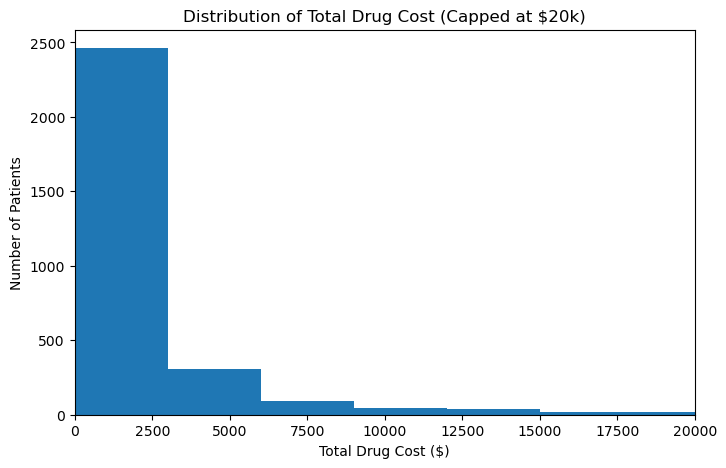

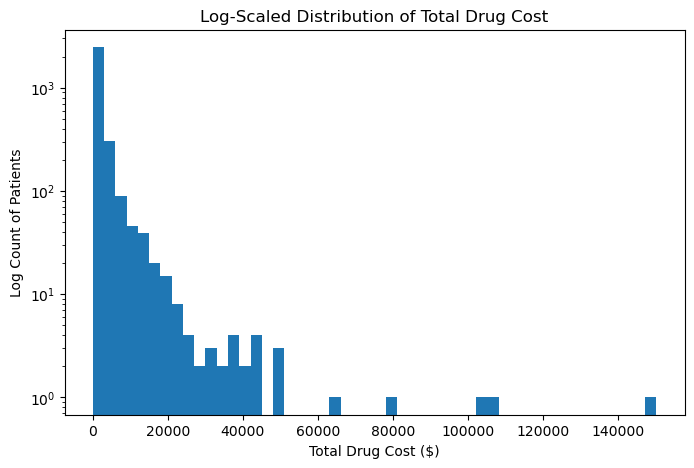

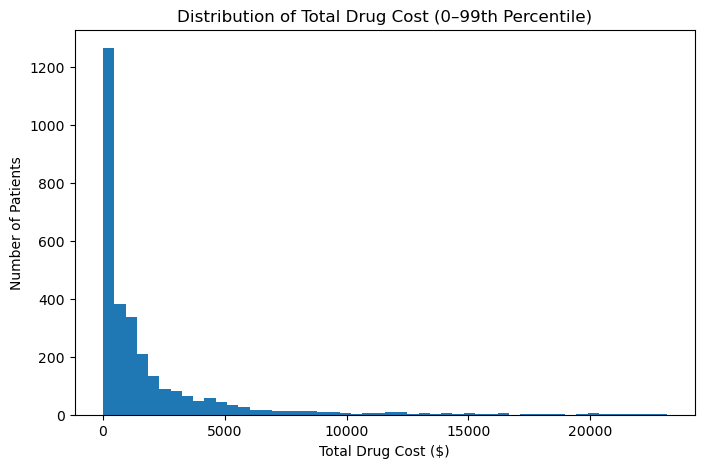

In [76]:
#Distribution of Total Drug Cost
import matplotlib.pyplot as plt

# -------------------------------------------------------
# Plot A: Cost distribution capped at $20,000
# -------------------------------------------------------
plt.figure(figsize=(8,5))

# plotting full distribution then capping x-axis for seeing main population
plt.hist(patient_summary["TOTAL_DRUG_COST"], bins=50)

plt.xlim(0, 20000)  # capping for visibility
plt.title("Distribution of Total Drug Cost (Capped at $20k)")
plt.xlabel("Total Drug Cost ($)")
plt.ylabel("Number of Patients")

plt.show()


# -------------------------------------------------------
# Plot B: Log-scaled distribution
# -------------------------------------------------------
plt.figure(figsize=(8,5))

# plotting full distribution with log scale for handling skew
plt.hist(patient_summary["TOTAL_DRUG_COST"], bins=50)
plt.yscale("log")

plt.title("Log-Scaled Distribution of Total Drug Cost")
plt.xlabel("Total Drug Cost ($)")
plt.ylabel("Log Count of Patients")

plt.show()


# -------------------------------------------------------
# Plot C: Distribution of Costs (0–99th Percentile Only)
# -------------------------------------------------------
# calculating 99th percentile cutoff for removing extreme outliers
p99 = patient_summary["TOTAL_DRUG_COST"].quantile(0.99)

# filtering to keep values in 0–99th percentile range
cost_99 = patient_summary[patient_summary["TOTAL_DRUG_COST"] <= p99]["TOTAL_DRUG_COST"]

plt.figure(figsize=(8,5))

# plotting 99th percentile distribution
plt.hist(cost_99, bins=50)

plt.title("Distribution of Total Drug Cost (0–99th Percentile)")
plt.xlabel("Total Drug Cost ($)")
plt.ylabel("Number of Patients")

plt.show()


In [82]:
#Utilization vs Cost

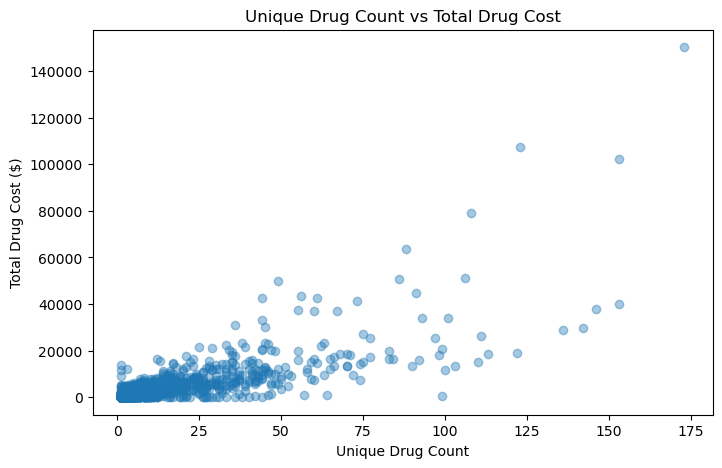

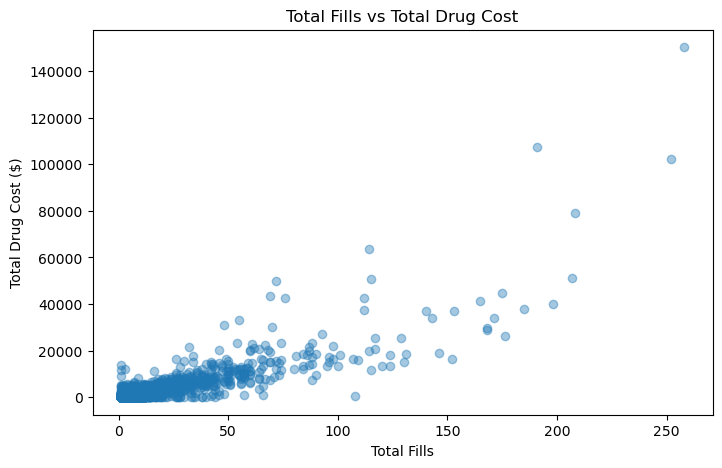

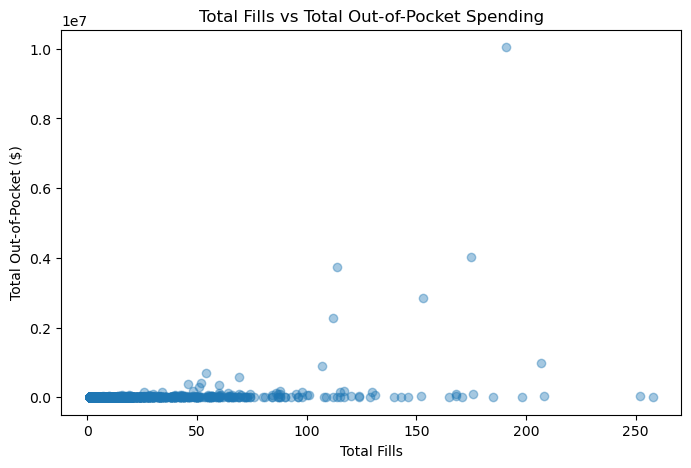

In [78]:
## plotting relation between unique drug count and total drug cost
plt.figure(figsize=(8, 5))
plt.scatter(
    patient_summary["UNIQUE_DRUG_COUNT"],
    patient_summary["TOTAL_DRUG_COST"],
    alpha=0.4
)
plt.title("Unique Drug Count vs Total Drug Cost")
plt.xlabel("Unique Drug Count")
plt.ylabel("Total Drug Cost ($)")
plt.show()

# plotting scatter for total fills vs total drug cost
plt.figure(figsize=(8, 5))
plt.scatter(
    patient_summary["TOTAL_FILLS"],
    patient_summary["TOTAL_DRUG_COST"],
    alpha=0.4
)
plt.title("Total Fills vs Total Drug Cost")
plt.xlabel("Total Fills")
plt.ylabel("Total Drug Cost ($)")
plt.show()

# plotting scatter for total fills vs total out-of-pocket
plt.figure(figsize=(8, 5))
plt.scatter(
    patient_summary["TOTAL_FILLS"],
    patient_summary["TOTAL_OOP"],
    alpha=0.4
)
plt.title("Total Fills vs Total Out-of-Pocket Spending")
plt.xlabel("Total Fills")
plt.ylabel("Total Out-of-Pocket ($)")
plt.show()


In [80]:
#Polypharmacy and High-Cost Visuals

<Figure size 700x500 with 0 Axes>

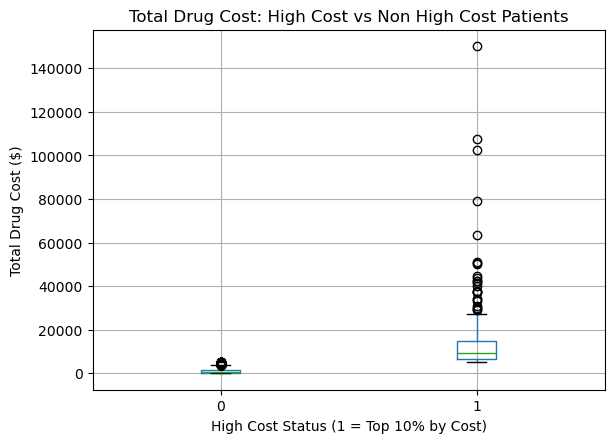

<Figure size 800x500 with 0 Axes>

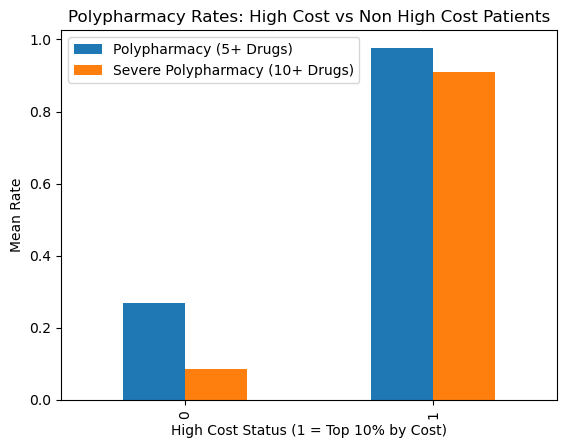

In [84]:
# plotting boxplot for comparing cost between high cost and normal patients
plt.figure(figsize=(7, 5))
patient_summary.boxplot(
    column="TOTAL_DRUG_COST",
    by="HIGH_COST_90"
)
plt.title("Total Drug Cost: High Cost vs Non High Cost Patients")
plt.suptitle("")  # removing automatic pandas title
plt.xlabel("High Cost Status (1 = Top 10% by Cost)")
plt.ylabel("Total Drug Cost ($)")
plt.show()

# calculating polypharmacy rates by high cost status
poly_rates = patient_summary.groupby("HIGH_COST_90")[["POLY_5PLUS", "POLY_10PLUS"]].mean()

# plotting bar chart for polypharmacy rates
plt.figure(figsize=(8, 5))
poly_rates.plot(kind="bar")
plt.title("Polypharmacy Rates: High Cost vs Non High Cost Patients")
plt.xlabel("High Cost Status (1 = Top 10% by Cost)")
plt.ylabel("Mean Rate")
plt.legend(["Polypharmacy (5+ Drugs)", "Severe Polypharmacy (10+ Drugs)"])
plt.show()


In [86]:
#Generic Use and Age/Demo Patterns

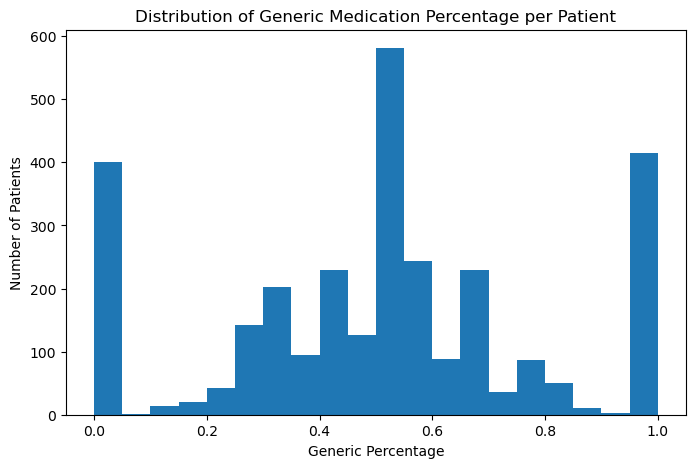

In [88]:
# plotting distribution of generic usage percent
plt.figure(figsize=(8, 5))
plt.hist(patient_summary["GENERIC_PERCENT"], bins=20)
plt.title("Distribution of Generic Medication Percentage per Patient")
plt.xlabel("Generic Percentage")
plt.ylabel("Number of Patients")
plt.show()


In [90]:

# creating age group buckets for simplifying age based plots
age_bins = [0, 44, 64, 74, 84, 120]
age_labels = ["<45", "45-64", "65-74", "75-84", "85+"]

patient_summary["AGE_GROUP"] = pd.cut(
    patient_summary["AGE_AT_END_REF_YR"].astype(float),
    bins=age_bins,
    labels=age_labels,
    right=True
)


C:\Users\rocki\AppData\Local\Temp\ipykernel_27392\1364533591.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cost = patient_summary.groupby("AGE_GROUP")["TOTAL_DRUG_COST"].mean()


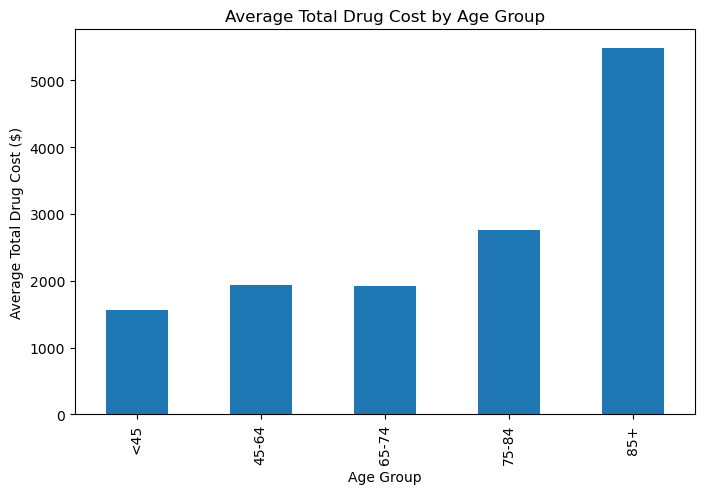

In [92]:
# calculating mean cost by age group
age_cost = patient_summary.groupby("AGE_GROUP")["TOTAL_DRUG_COST"].mean()

# plotting mean cost by age group
plt.figure(figsize=(8, 5))
age_cost.plot(kind="bar")
plt.title("Average Total Drug Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Drug Cost ($)")
plt.show()


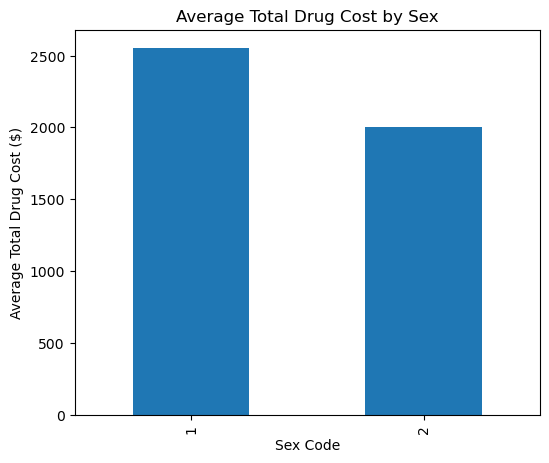

In [94]:
# calculating mean cost by sex code
sex_cost = patient_summary.groupby("SEX_IDENT_CD")["TOTAL_DRUG_COST"].mean()

plt.figure(figsize=(6, 5))
sex_cost.plot(kind="bar")
plt.title("Average Total Drug Cost by Sex")
plt.xlabel("Sex Code")
plt.ylabel("Average Total Drug Cost ($)")
plt.show()


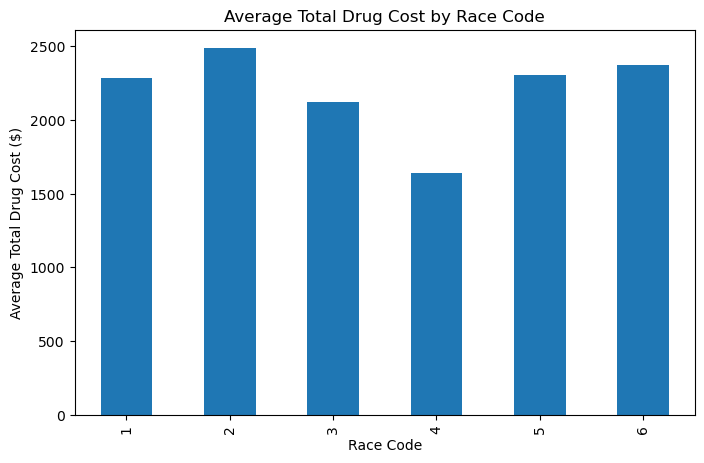

In [96]:
# calculating mean cost by race code
race_cost = patient_summary.groupby("BENE_RACE_CD")["TOTAL_DRUG_COST"].mean()

plt.figure(figsize=(8, 5))
race_cost.plot(kind="bar")
plt.title("Average Total Drug Cost by Race Code")
plt.xlabel("Race Code")
plt.ylabel("Average Total Drug Cost ($)")
plt.show()


C:\Users\rocki\AppData\Local\Temp\ipykernel_27392\2317394913.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  poly_by_age = patient_summary.groupby("AGE_GROUP")[["POLY_5PLUS", "POLY_10PLUS"]].mean()


<Figure size 800x500 with 0 Axes>

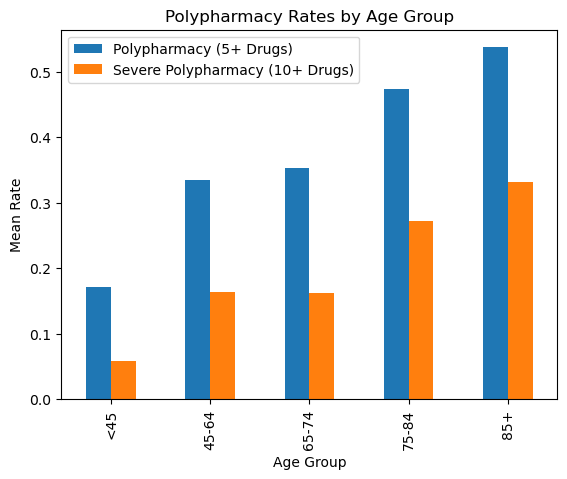

In [98]:
# calculating polypharmacy rates by age group
poly_by_age = patient_summary.groupby("AGE_GROUP")[["POLY_5PLUS", "POLY_10PLUS"]].mean()

plt.figure(figsize=(8, 5))
poly_by_age.plot(kind="bar")
plt.title("Polypharmacy Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Rate")
plt.legend(["Polypharmacy (5+ Drugs)", "Severe Polypharmacy (10+ Drugs)"])
plt.show()


**Predictive Modeling for High-Cost Patients**

In [117]:
import pandas as pd
import numpy as np

# converting age into numeric for modeling
patient_summary["AGE_AT_END_REF_YR"] = pd.to_numeric(
    patient_summary["AGE_AT_END_REF_YR"],
    errors="coerce"
)

# filling missing age values using median
age_median = patient_summary["AGE_AT_END_REF_YR"].median()
patient_summary["AGE_AT_END_REF_YR"] = patient_summary["AGE_AT_END_REF_YR"].fillna(age_median)

# converting ESRD indicator into numeric 0/1
patient_summary["ESRD_IND"] = patient_summary["ESRD_IND"].replace({"Y": 1, "N": 0})
patient_summary["ESRD_IND"] = pd.to_numeric(
    patient_summary["ESRD_IND"],
    errors="coerce"
).fillna(0).astype(int)

# converting other categorical codes into numeric
cat_cols = [
    "SEX_IDENT_CD",
    "BENE_RACE_CD",
    "DUAL_ELGBL_MONS",
    "BENE_STATE_BUYIN_TOT_MONS",
    "BENE_HMO_CVRAGE_TOT_MONS"
]

for col in cat_cols:
    patient_summary[col] = pd.to_numeric(
        patient_summary[col],
        errors="coerce"
    ).fillna(0)


In [119]:
# selecting features for predicting high cost patients
model_features = [
    "TOTAL_FILLS",
    "TOTAL_QUANTITY",
    "TOTAL_DAYS_SUPPLY",
    "UNIQUE_DRUG_COUNT",
    "TOTAL_GENERIC_CLAIMS",
    "GENERIC_PERCENT",
    "AVG_DAYS_SUPPLY",
    "AGE_AT_END_REF_YR",
    "SEX_IDENT_CD",
    "BENE_RACE_CD",
    "ESRD_IND",
    "DUAL_ELGBL_MONS",
    "BENE_STATE_BUYIN_TOT_MONS",
    "BENE_HMO_CVRAGE_TOT_MONS"
]

X = patient_summary[model_features]
y = patient_summary["HIGH_COST_90"]


In [121]:
from sklearn.model_selection import train_test_split

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [123]:
from sklearn.preprocessing import StandardScaler

# creating scaler object and scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [125]:
from sklearn.linear_model import LogisticRegression

# creating logistic regression model
log_model = LogisticRegression(max_iter=500)

# training model
log_model.fit(X_train_scaled, y_train)

# predicting probabilities
y_pred_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# converting probabilities into class labels
y_pred = (y_pred_prob >= 0.5).astype(int)


In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# calculating evaluation metrics for model performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

acc, prec, rec, f1, auc


(0.9601990049751243,
 0.8214285714285714,
 0.7666666666666667,
 0.7931034482758621,
 0.9581645181092695)

In [129]:
from sklearn.metrics import confusion_matrix

# creating confusion matrix to inspect error patterns
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[533,  10],
       [ 14,  46]], dtype=int64)

In [131]:
# creating clean coefficient table for interpretation
coef_table = pd.DataFrame({
    "Feature": model_features,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_table


,Feature,Coefficient
0,TOTAL_FILLS,2.166628
1,TOTAL_QUANTITY,0.805914
4,TOTAL_GENERIC_CLAIMS,0.302449
5,GENERIC_PERCENT,0.173310
8,SEX_IDENT_CD,0.159346
2,TOTAL_DAYS_SUPPLY,0.113650
10,ESRD_IND,0.008262
9,BENE_RACE_CD,0.002171
11,DUAL_ELGBL_MONS,0.000000
12,BENE_STATE_BUYIN_TOT_MONS,0.000000


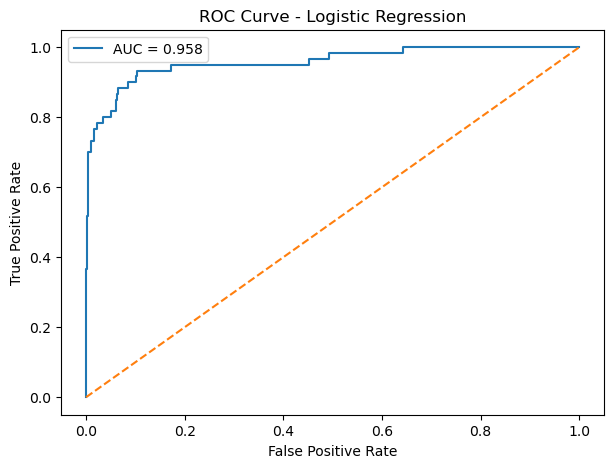

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# calculating coordinates for plotting roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plotting roc curve for understanding model performance
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()

plt.show()


**Random Forest Model**

In [136]:
# using same features defined earlier
X = patient_summary[model_features]
y = patient_summary["HIGH_COST_90"]


In [138]:
from sklearn.model_selection import train_test_split

# splitting data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [140]:
from sklearn.ensemble import RandomForestClassifier

# creating random forest model with default parameters
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

# training random forest model
rf_model.fit(X_train, y_train)

# predicting probabilities and classes
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)


In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# calculating evaluation metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

acc_rf, prec_rf, rec_rf, f1_rf, auc_rf


(0.956882255389718,
 0.7833333333333333,
 0.7833333333333333,
 0.7833333333333333,
 0.9757366482504605)

In [144]:
from sklearn.metrics import confusion_matrix

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf


array([[530,  13],
       [ 13,  47]], dtype=int64)

In [146]:
import pandas as pd
import numpy as np

# extracting feature importance
rf_importances = rf_model.feature_importances_

feature_importance_table = pd.DataFrame({
    "Feature": model_features,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

feature_importance_table


,Feature,Importance
0,TOTAL_FILLS,0.241237
4,TOTAL_GENERIC_CLAIMS,0.167859
3,UNIQUE_DRUG_COUNT,0.144898
1,TOTAL_QUANTITY,0.140160
2,TOTAL_DAYS_SUPPLY,0.120019
6,AVG_DAYS_SUPPLY,0.067668
7,AGE_AT_END_REF_YR,0.048636
5,GENERIC_PERCENT,0.038601
9,BENE_RACE_CD,0.017650
8,SEX_IDENT_CD,0.009480


**XGBoost Model**

In [149]:
from xgboost import XGBClassifier


In [151]:
# creating XGBoost model with balanced and efficient settings
xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

# fitting the model
xgb_model.fit(X_train, y_train)

# predictions
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)


In [153]:
# evaluating XGBoost performance
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

acc_xgb, prec_xgb, rec_xgb, f1_xgb, auc_xgb


(0.9585406301824212,
 0.7692307692307693,
 0.8333333333333334,
 0.8,
 0.9735727440147329)

In [155]:
#confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_xgb


array([[528,  15],
       [ 10,  50]], dtype=int64)

In [157]:
import pandas as pd

xgb_importances = xgb_model.feature_importances_

xgb_feature_importance = pd.DataFrame({
    "Feature": model_features,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

xgb_feature_importance


,Feature,Importance
0,TOTAL_FILLS,0.643680
3,UNIQUE_DRUG_COUNT,0.087565
4,TOTAL_GENERIC_CLAIMS,0.050882
1,TOTAL_QUANTITY,0.032035
10,ESRD_IND,0.031089
6,AVG_DAYS_SUPPLY,0.028922
2,TOTAL_DAYS_SUPPLY,0.027975
9,BENE_RACE_CD,0.027718
5,GENERIC_PERCENT,0.024779
7,AGE_AT_END_REF_YR,0.023098


In [159]:
import shap

# initializing SHAP TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)

# calculating SHAP values for the test set
shap_values = explainer.shap_values(X_test)


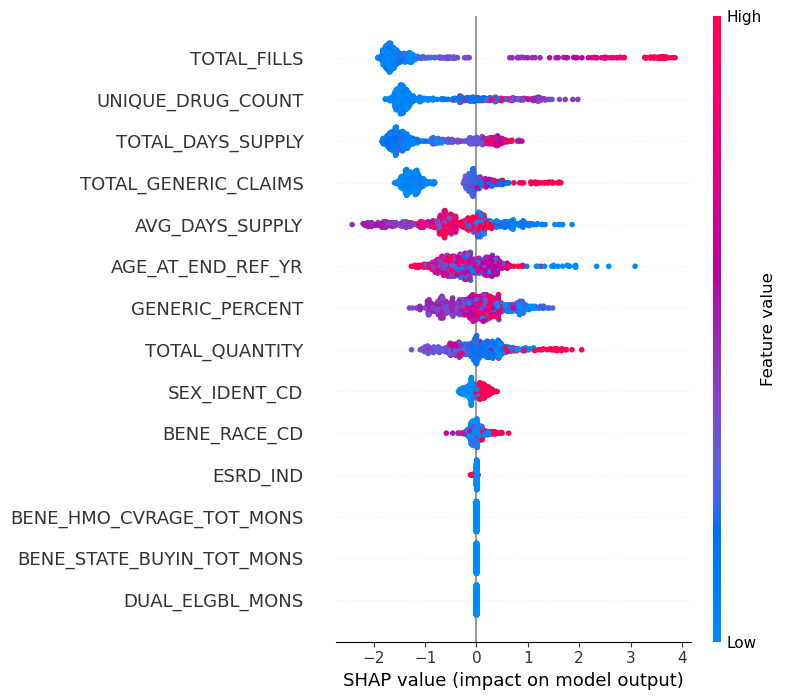

In [161]:
shap.summary_plot(shap_values, X_test, plot_type="dot")


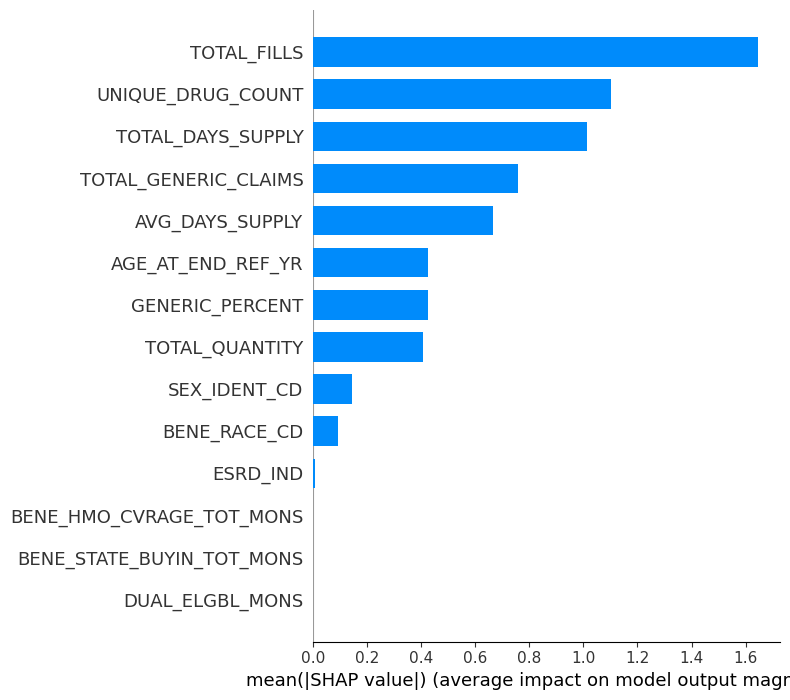

In [163]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


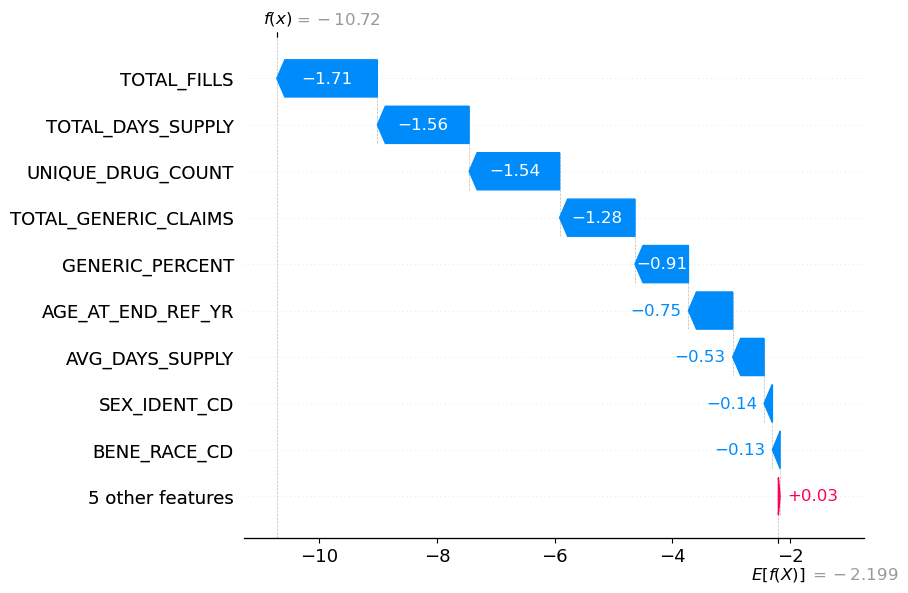

In [165]:
# selecting one patient from test set
i = 0  

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[i],
    feature_names=X_test.columns
)


**Final Project Summary**

This project focuses on developing an explainable machine learning framework to identify high-cost Medicare Part D beneficiaries using real-world PDE (Prescription Drug Event) and Beneficiary Summary Files. The analysis simulates a true payer analytics workflow: transforming raw claims into patient-level features, understanding drug utilization patterns, and building predictive models to flag members likely to incur high annual drug costs.

**Objectives**

Convert raw PDE claims into a clean, patient-level dataset

Engineer clinically meaningful features (fills, drug count, supply, OOP, generic %)

Build and compare multiple classification models

Interpret results using XGBoost + SHAP

Identify key drivers of high-cost behavior

**Key Insights**
1. Claims Behavior Strongly Predicts Cost

Across all models, these emerged as the biggest drivers:

Total fills (strongest predictor)

Unique drug count (polypharmacy)

Low generic utilization

High quantity / days supply

ESRD indicator

This aligns with industry literature on Part D spending patterns.

2. Model Performance Overview
Model	Accuracy	Precision	Recall	F1	AUC
Logistic Regression	~0.96	~0.82	~0.77	~0.79	~0.95
Random Forest	~0.96	~0.78	~0.78	~0.78	0.977
XGBoost	~0.96	~0.77	0.83	0.80	0.974
Takeaways

Random Forest achieved the highest AUC (0.977).

XGBoost achieved the highest recall (0.83), making it the best for identifying high-cost patients—critical for cost-containment strategies.

Logistic regression served as a solid interpretable baseline.

3. SHAP Explainability

SHAP analysis of XGBoost revealed:

Total fills overwhelmingly push predictions toward high cost

Polypharmacy (unique drug count) contributes heavily

Higher generic use depresses high-cost probability

ESRD status adds expected clinical risk

Individual waterfall plots show exactly which features contribute to patient-level predictions, enabling transparent decision-making.

4. Real-World Impact

Health plans can use these insights to:

Identify high-risk Part D members early

Target medication management or MTM interventions

Improve formulary design

Prioritize members for pharmacist outreach

Reduce avoidable spending through generic substitution strategies

This mirrors real practices at Optum, CVS Health, Cigna, and Elevance.

5. Limitations

Only one year of PDE data was available

No integration of diagnosis or pharmacy network data

Cost threshold (top 10%) is a simplistic proxy for high spend

Claims do not capture adherence beyond fills

6. Future Work

Incorporate multi-year Part D datasets for temporal modeling

Use LSTM models for sequential pharmacy patterns

Add CMS chronic condition indicators (CCIs)

Predict cost buckets instead of binary high-cost outcome

Evaluate fairness across race, age, and dual-eligible groups

**Conclusion**

This project demonstrates a complete RWD analytics workflow—from raw claims ingestion to explainable machine learning. The combination of strong performance (AUC ~0.97), clinically relevant feature engineering, and SHAP transparency makes this a flagship portfolio project suitable for roles in healthcare analytics, RWE, HEOR, PBM, payer data science, and clinical informatics.